In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 



from sklearn.pipeline import Pipeline
 # streaming pipelines

from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class

from collections import Counter


In [3]:
gi_df = pd.read_csv(r"C:\Users\SONY\Downloads\glass.csv")
gi_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
gi_df.shape

(214, 10)

In [31]:
gi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [32]:
gi_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [33]:
gi_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:xlabel='RI'>

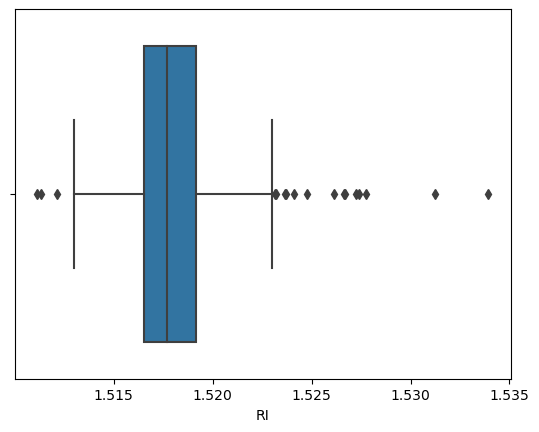

In [9]:
#  using box plot 
sns.boxplot(gi_df['RI'])


<AxesSubplot:xlabel='Na'>

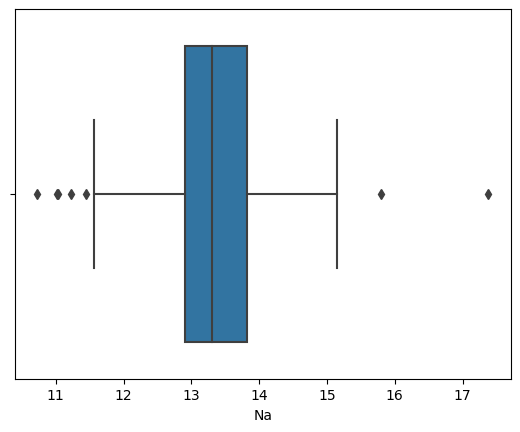

In [11]:
sns.boxplot(gi_df['Na'])

<AxesSubplot:xlabel='Mg'>

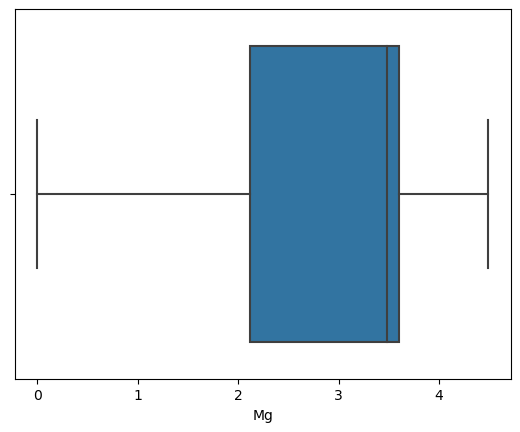

In [12]:
sns.boxplot(gi_df['Mg'])

<AxesSubplot:xlabel='Al'>

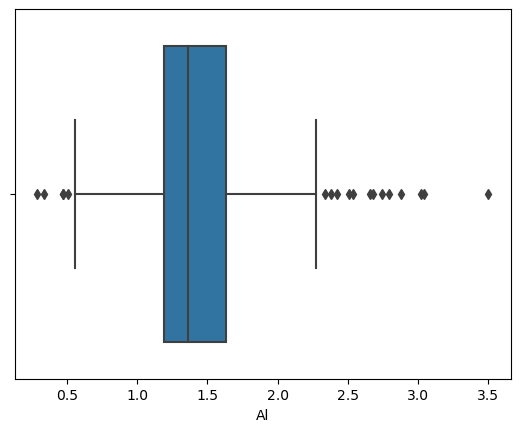

In [13]:
sns.boxplot(gi_df['Al'])

<AxesSubplot:xlabel='Si'>

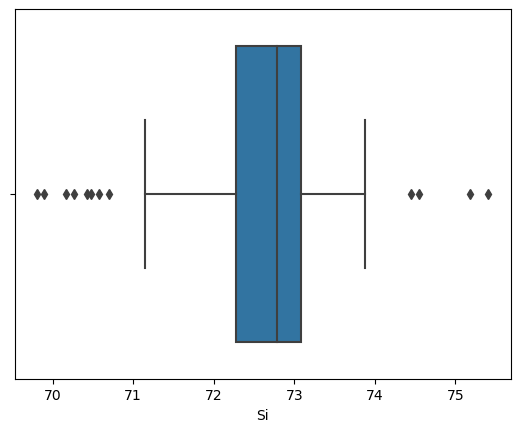

In [14]:
sns.boxplot(gi_df['Si'])

<AxesSubplot:xlabel='K'>

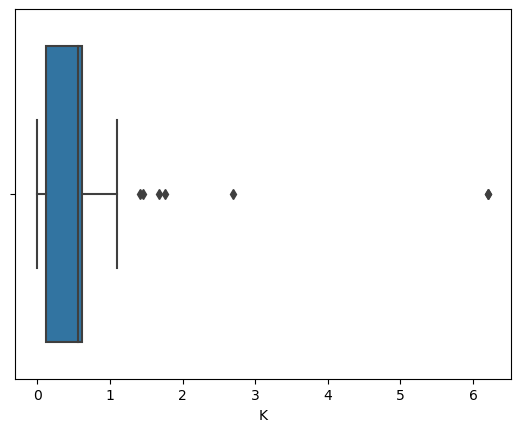

In [15]:
sns.boxplot(gi_df['K'])

<AxesSubplot:xlabel='Ca'>

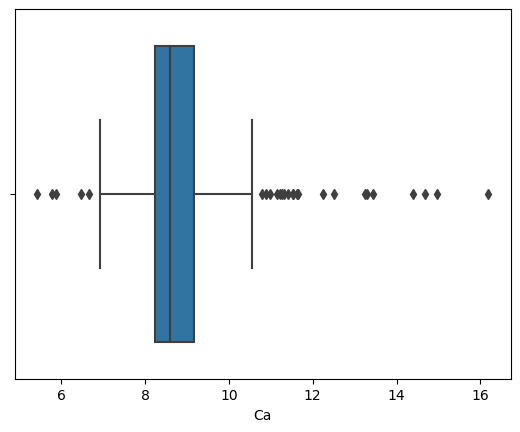

In [16]:
sns.boxplot(gi_df['Ca'])

<AxesSubplot:xlabel='Ba'>

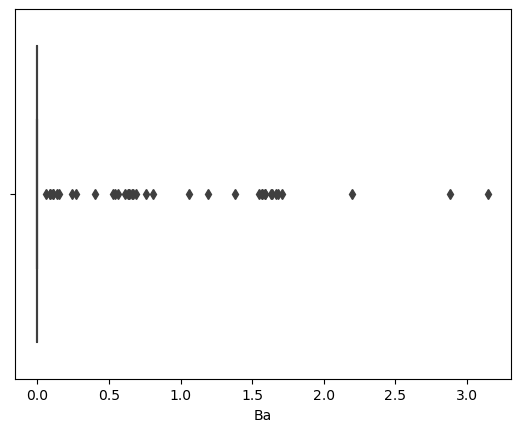

In [34]:
sns.boxplot(gi_df['Ba'])

<AxesSubplot:xlabel='Fe'>

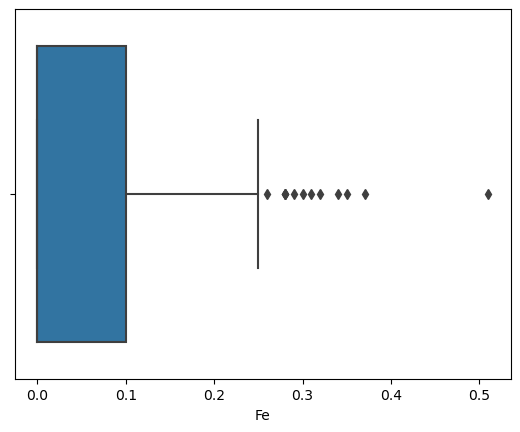

In [18]:
sns.boxplot(gi_df['Fe'])

In [20]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = gi_df[features]

y = gi_df[label]

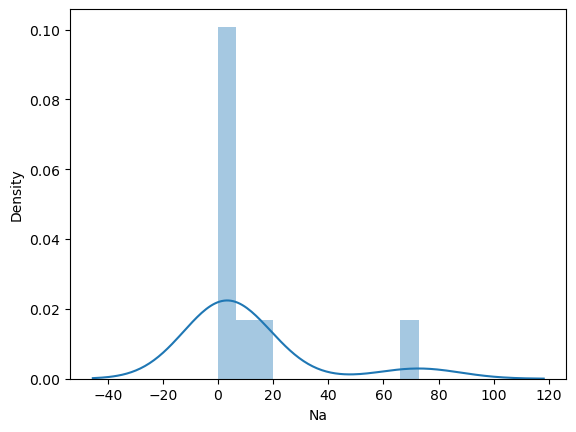

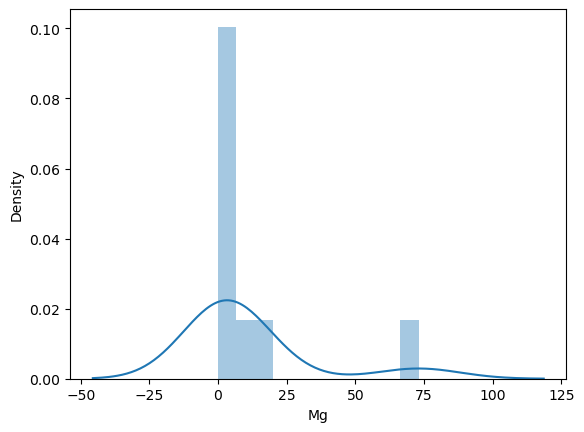

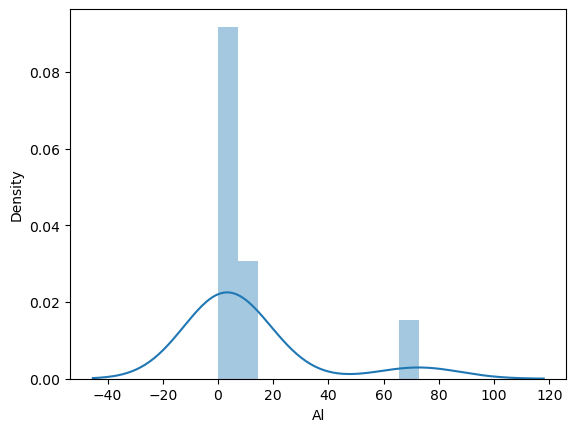

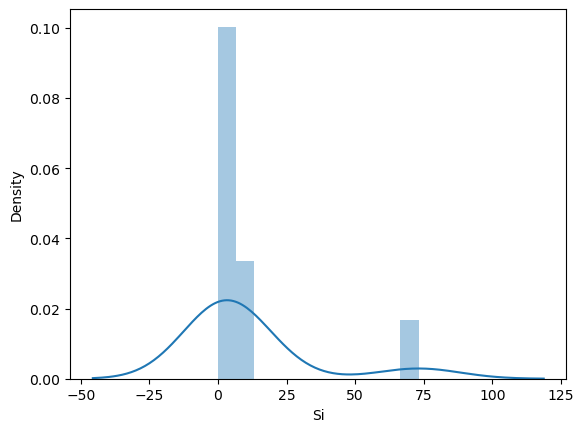

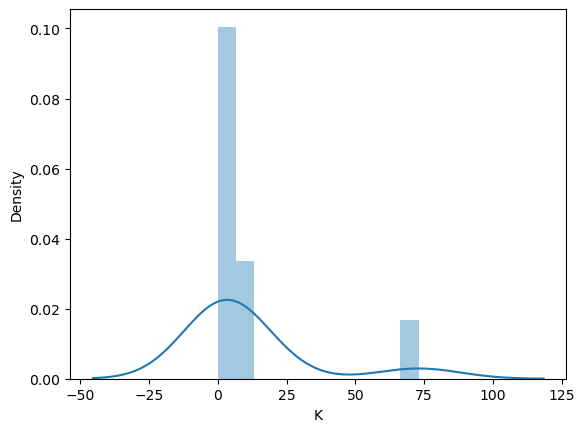

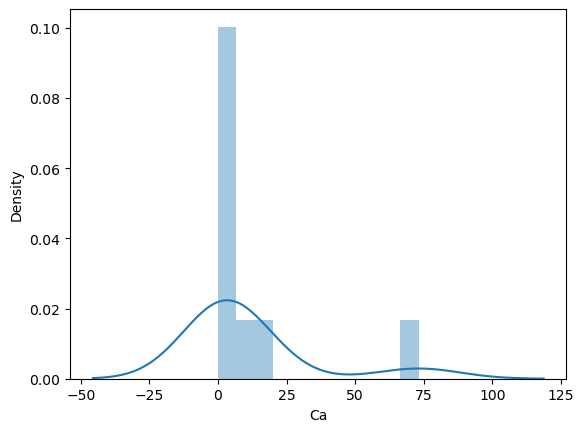

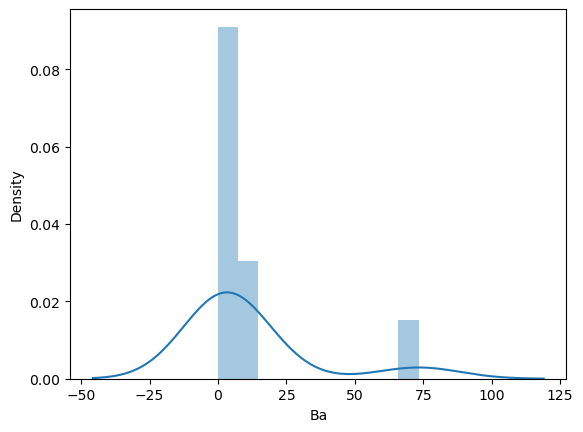

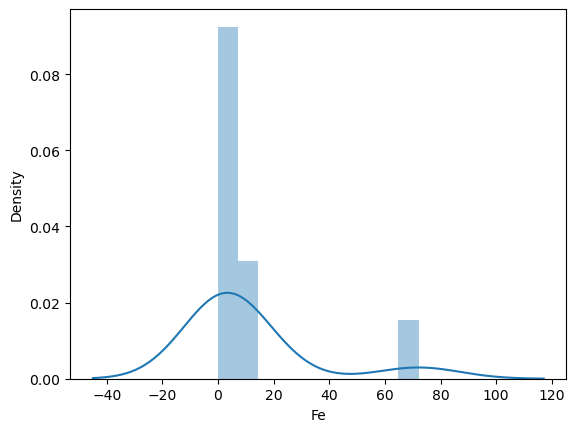

In [21]:
A = X.values
for i in range(1,9):
        sns.distplot(A[i])
        plt.xlabel(features[i])
        plt.show()


In [36]:
Q1=gi_df['RI'].quantile(0.25)
Q2=gi_df['RI'].quantile(0.5)
Q3=gi_df['RI'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

1.5125700000000002
1.52311


In [37]:
gi_df['RI'] = np.where(gi_df['RI']> upplim,upplim,
                        np.where(gi_df['RI']<lowlim,lowlim, gi_df['RI']))

<AxesSubplot:xlabel='RI'>

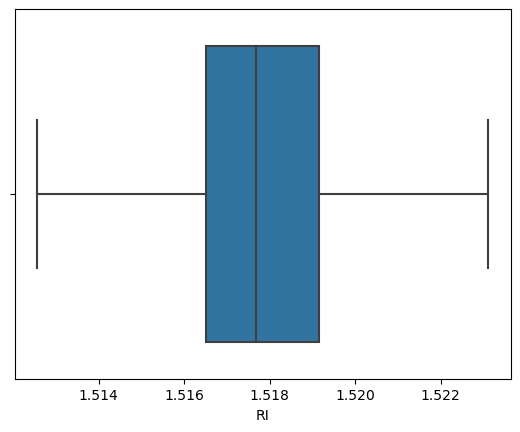

In [38]:
sns.boxplot(gi_df['RI'])

<AxesSubplot:xlabel='RI', ylabel='Density'>

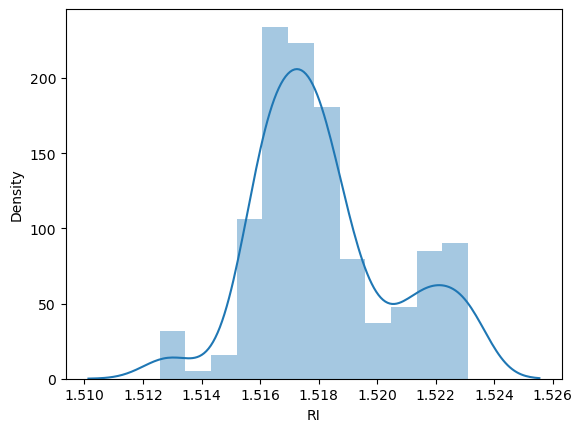

In [39]:
sns.distplot(gi_df['RI'])

In [40]:
Q1=gi_df['Al'].quantile(0.25)
Q2=gi_df['Al'].quantile(0.5)
Q3=gi_df['Al'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

0.53
2.29


In [41]:
gi_df['Al'] = np.where(gi_df['Al']> upplim,upplim,
                        np.where(gi_df['Al']<lowlim,lowlim, gi_df['Al']))

<AxesSubplot:xlabel='Al'>

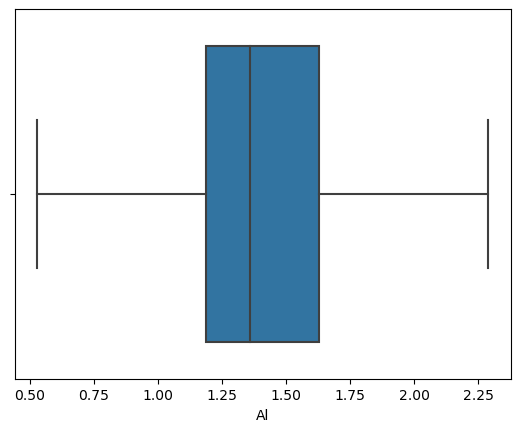

In [43]:
sns.boxplot(gi_df['Al'])


<AxesSubplot:xlabel='Al', ylabel='Density'>

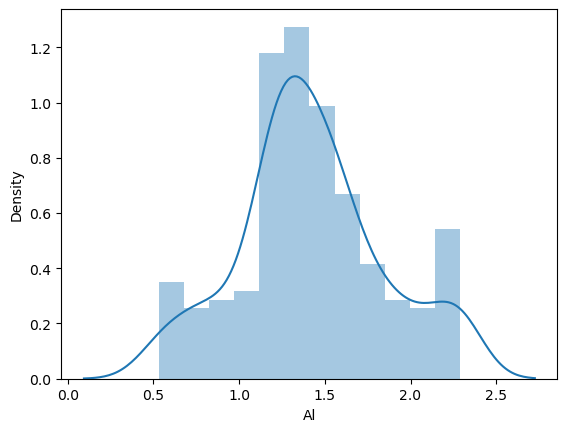

In [44]:
sns.distplot(gi_df['Al'])

In [45]:
Q1=gi_df['Si'].quantile(0.25)
Q2=gi_df['Si'].quantile(0.5)
Q3=gi_df['Si'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

71.06875
74.29875000000001


In [46]:
gi_df['Si'] = np.where(gi_df['Si']> upplim,upplim,
                        np.where(gi_df['Si']<lowlim,lowlim, gi_df['Si']))

<AxesSubplot:xlabel='Si'>

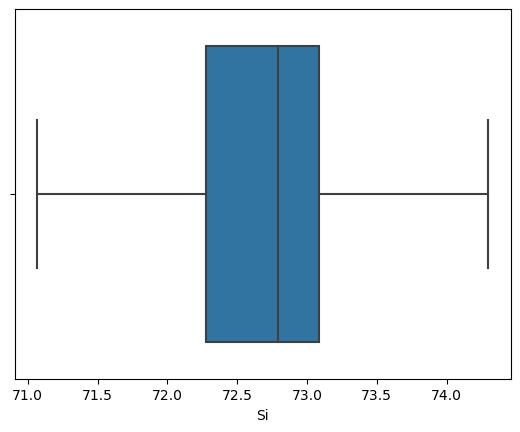

In [47]:
sns.boxplot(gi_df['Si'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

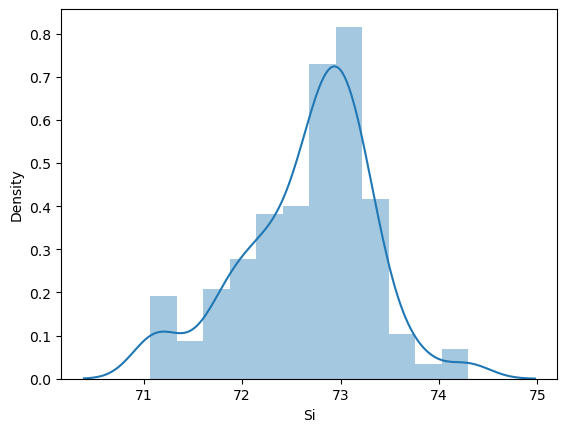

In [48]:
sns.distplot(gi_df['Si'])

In [50]:
Q1=gi_df['Ca'].quantile(0.25)
Q2=gi_df['Ca'].quantile(0.5)
Q3=gi_df['Ca'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

6.841250000000001
10.57125


In [51]:
gi_df['Ca'] = np.where(gi_df['Ca']> upplim,upplim,
                        np.where(gi_df['Ca']<lowlim,lowlim, gi_df['Ca']))

<AxesSubplot:xlabel='Ca'>

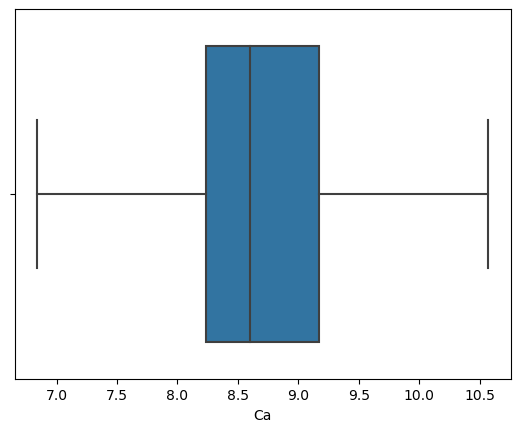

In [54]:
sns.boxplot(gi_df['Ca'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

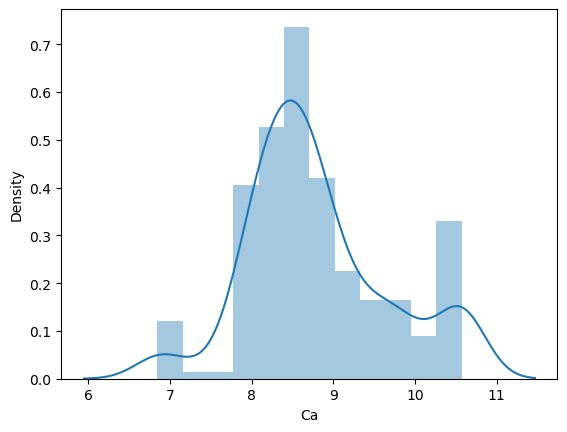

In [55]:
sns.distplot(gi_df['Ca'])

In [52]:
Q1=gi_df['K'].quantile(0.25)
Q2=gi_df['K'].quantile(0.5)
Q3=gi_df['K'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.6087499999999999
1.34125


In [53]:
gi_df['K'] = np.where(gi_df['K']> upplim,upplim,
                        np.where(gi_df['K']<lowlim,lowlim, gi_df['K']))

<AxesSubplot:xlabel='K'>

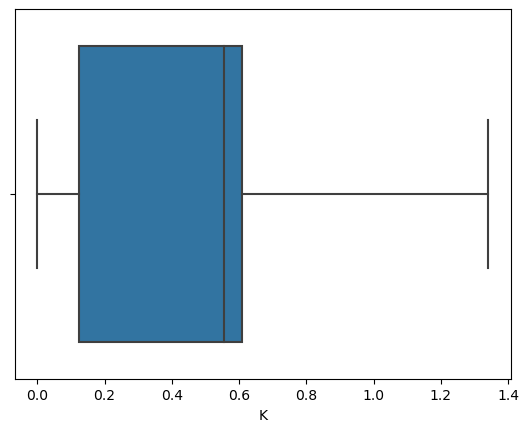

In [56]:
sns.boxplot(gi_df['K'])

<AxesSubplot:xlabel='K', ylabel='Density'>

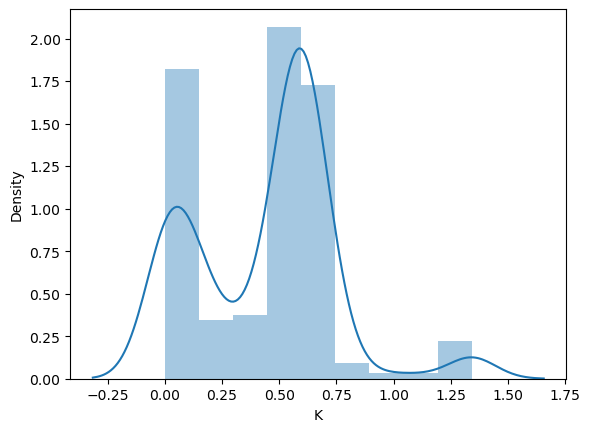

In [57]:
sns.distplot(gi_df['K'])

In [58]:
Q1=gi_df['Fe'].quantile(0.25)
Q2=gi_df['Fe'].quantile(0.5)
Q3=gi_df['Fe'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.15000000000000002
0.25


In [59]:
gi_df['Fe'] = np.where(gi_df['Fe']> upplim,upplim,
                        np.where(gi_df['Fe']<lowlim,lowlim, gi_df['Fe']))

<AxesSubplot:xlabel='Fe'>

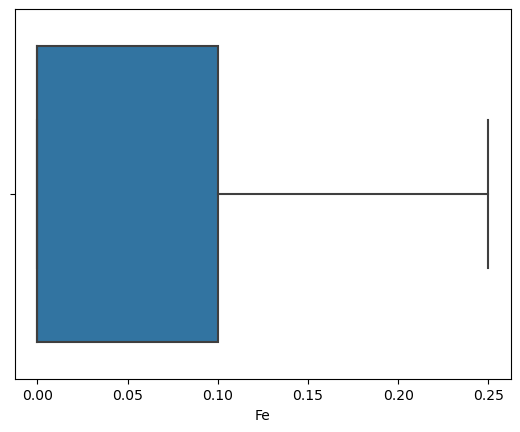

In [60]:
sns.boxplot(gi_df['Fe'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

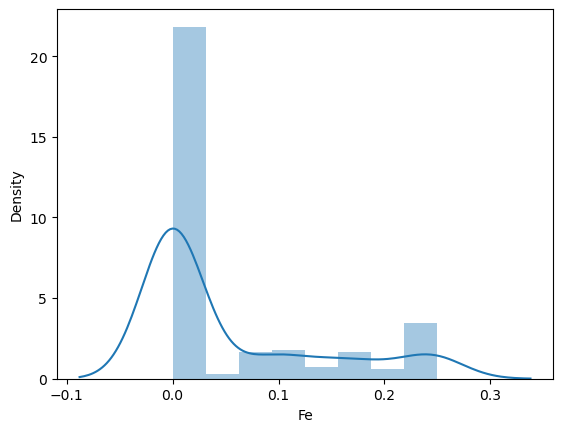

In [61]:
sns.distplot(gi_df['Fe'])

In [12]:
gi_df['Fe'].skew()


1.754327470435831

In [62]:
Q1=gi_df['Na'].quantile(0.25)
Q2=gi_df['Na'].quantile(0.5)
Q3=gi_df['Na'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

11.531250000000004
15.201249999999998


In [63]:
gi_df['Na'] = np.where(gi_df['Na']> upplim,upplim,
                        np.where(gi_df['Na']<lowlim,lowlim, gi_df['Na']))

<AxesSubplot:xlabel='Na'>

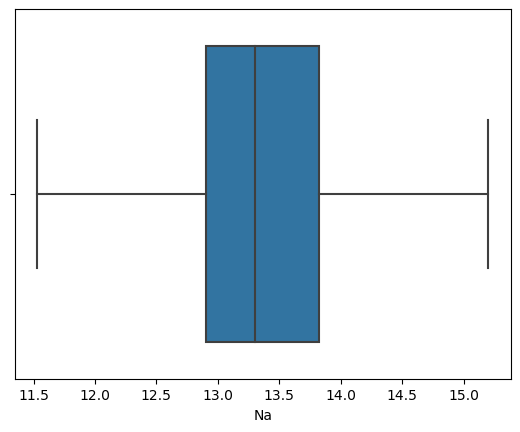

In [64]:
sns.boxplot(gi_df['Na'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

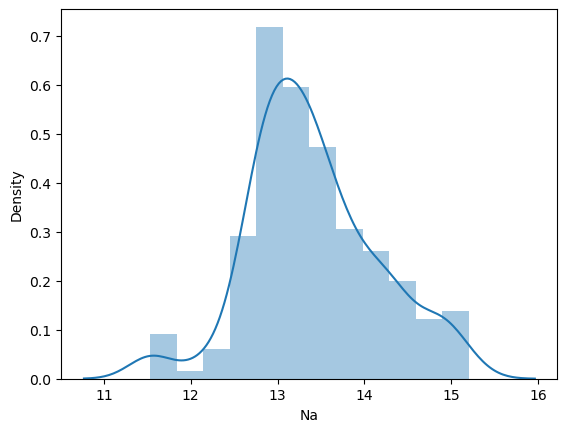

In [65]:
sns.distplot(gi_df['Na'])

In [5]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = gi_df[features]

Y = gi_df[label]
     

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 2)

In [21]:
Lr = LogisticRegression()
Dt = DecisionTreeClassifier()
svc =SVC()

In [24]:
Lr.fit(X_train,Y_train)
Dt.fit(X_train,Y_train)
svc.fit(X_train,Y_train)
y_pred = Lr.predict(X_test)
y_pred1 = Dt.predict(X_test)
y_pred2 = svc.predict(X_test)

print ("Accuracy Lr", accuracy_score(Y_test,y_pred))
print("Accuracy Dt", accuracy_score(Y_test, y_pred1))
print ("Accuracy score", accuracy_score(Y_test,y_pred2))


Accuracy Lr 0.4883720930232558
Accuracy Dt 0.6744186046511628
Accuracy score 0.27906976744186046


In [25]:
print (Dt.score(X_train,Y_train))

1.0


In [28]:
trf = FunctionTransformer(func=np.log1p)

In [29]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [31]:
lr = LogisticRegression()

lr.fit(X_train_transformed,Y_train)
y_pred=lr.predict(X_test)
print ("Accuracy Lr", accuracy_score(Y_test,y_pred))


Accuracy Lr 0.5581395348837209


In [42]:
print (Lr.score(X_train,Y_train))

0.5789473684210527


As we can check from the above scores decision tree is overfitting and Logistic regression is giving the better score . 
     